# Classification Data Preparation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from acquire import get_titanic_data
from env import get_connection

Model Training:

Train/Validate/Test

Overfitting:
- When a model is overfit, it make impeccable guesses on the training dataset.  
- An overfit model makes relatively poor predictions on out-of-sample data.  
- Out-of-sample data can be the validation and test sets.

# Summarizing the Data

In [68]:
df = get_titanic_data(get_connection)
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [69]:
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [70]:
numerical_columns = df.select_dtypes(exclude = object).columns.to_list()

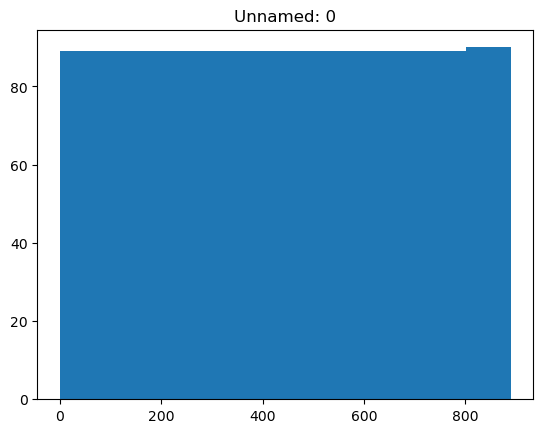

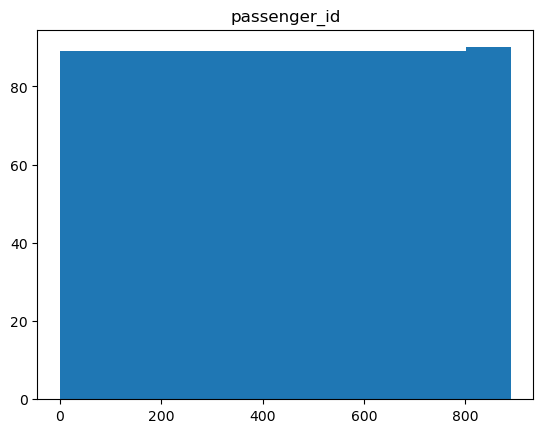

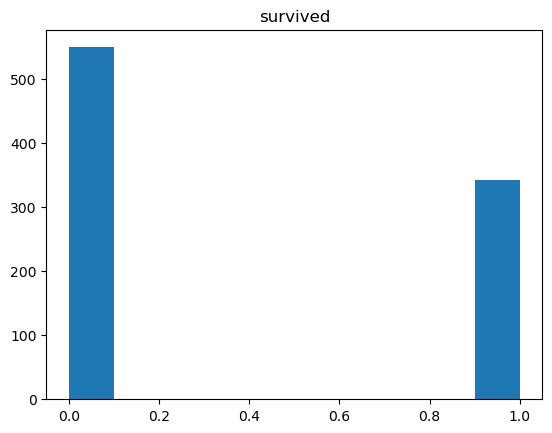

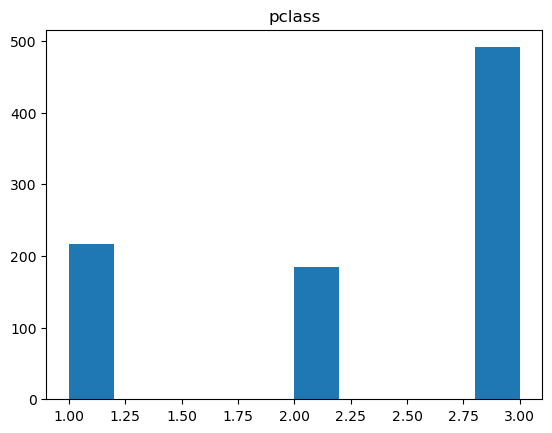

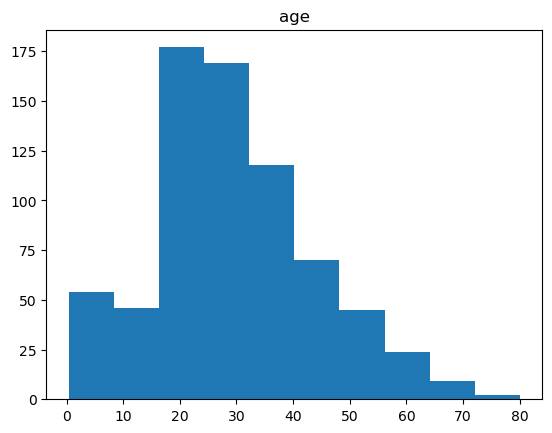

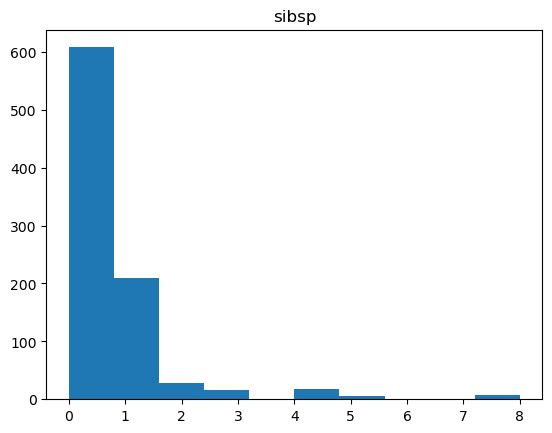

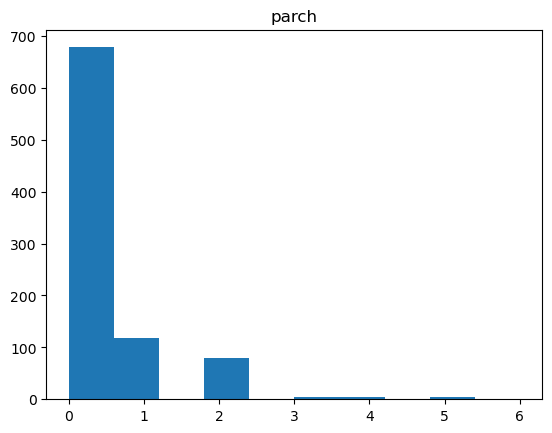

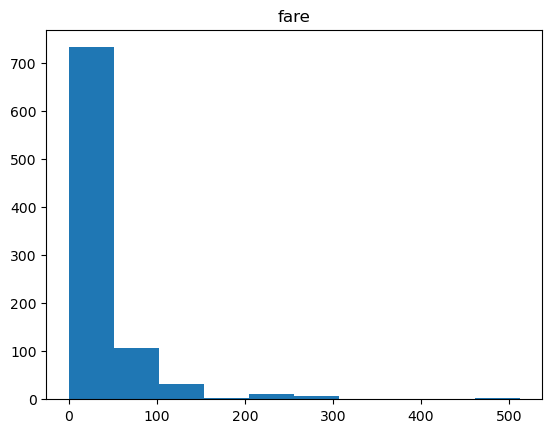

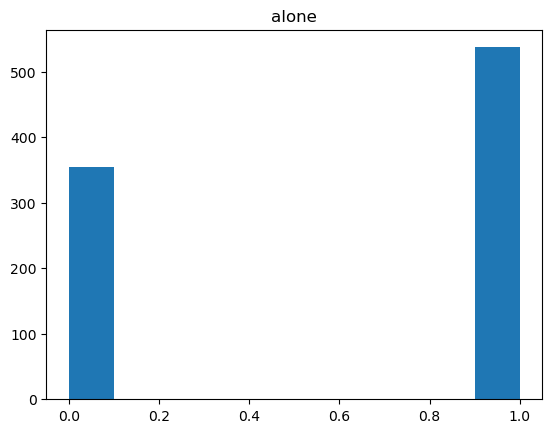

In [71]:
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [72]:
df.select_dtypes(include='object')

,sex,embarked,class,deck,embark_town
0,male,S,Third,NaN,Southampton
1,female,C,First,C,Cherbourg
2,female,S,Third,NaN,Southampton
3,female,S,First,C,Southampton
4,male,S,Third,NaN,Southampton
...,...,...,...,...,...
886,male,S,Second,NaN,Southampton
887,female,S,First,B,Southampton
888,female,S,Third,NaN,Southampton
889,male,C,First,C,Cherbourg


In [73]:
categorical_columns = df.select_dtypes(include='object').columns.to_list()

for col in categorical_columns:
    
    print(df[col].value_counts())
    print('----------------')

male      577
female    314
Name: sex, dtype: int64
----------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
----------------
Third     491
First     216
Second    184
Name: class, dtype: int64
----------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
----------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
----------------


In [74]:
df.isna().sum()

Unnamed: 0        0
passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [75]:
df[df['age'].isna()]

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
5,5,5,0,3,male,NaN,0,0,8.4583,Q,Third,NaN,Queenstown,1
17,17,17,1,2,male,NaN,0,0,13.0000,S,Second,NaN,Southampton,1
19,19,19,1,3,female,NaN,0,0,7.2250,C,Third,NaN,Cherbourg,1
26,26,26,0,3,male,NaN,0,0,7.2250,C,Third,NaN,Cherbourg,1
28,28,28,1,3,female,NaN,0,0,7.8792,Q,Third,NaN,Queenstown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,859,859,0,3,male,NaN,0,0,7.2292,C,Third,NaN,Cherbourg,1
863,863,863,0,3,female,NaN,8,2,69.5500,S,Third,NaN,Southampton,0
868,868,868,0,3,male,NaN,0,0,9.5000,S,Third,NaN,Southampton,1
878,878,878,0,3,male,NaN,0,0,7.8958,S,Third,NaN,Southampton,1


There's duplicate information here.  

Get rid of clas and embarked, they're duplicates.  
Drop deck because of all of the nulls.  
Passenger id is also basically worthless.  
Drop age because it may be difficult to impute.

# Cleaning the Data

In [76]:
to_drop = ['class', 'embarked', 'deck', 'passenger_id', 'age']

df.drop(columns=to_drop, inplace=True)


In [77]:
df.head()

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [78]:
df.isna().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    2
alone          0
dtype: int64

In [79]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [80]:
df['embark_town'].fillna('Southampton', inplace=True)

# Making Dummies

In [81]:
pd.get_dummies(df[['sex', 'embark_town']])

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [82]:
dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)

In [83]:
df = pd.concat([df, dummies], axis=1)
df.head()

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [125]:
def clean_titanic(df):
    to_drop = ['class', 'embarked', 'deck', 'passenger_id', 'age']
    df.drop(columns=to_drop, inplace=True)
    df['embark_town'].fillna('Southampton', inplace=True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    return df

In [119]:
test_dataframe = get_titanic_data(get_connection)

In [ ]:
clean_titanic(test_dataframe)

In [123]:
test_dataframe.head()

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [85]:
df.head()

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [90]:
df.drop(columns='Unnamed: 0', inplace=True)

# Split Data

In [93]:
seed = 42

train, val_test = train_test_split(df, train_size=.7, random_state=seed, stratify=df['survived'])

In [92]:
train.shape, test.shape

((623, 11), (268, 11))

In [95]:
seed = 42

validate, test = train_test_split(val_test, train_size=.5, random_state=seed, stratify=val_test['survived'])

In [97]:
def train_val_test(df):
    
    seed = 42
    train, val_test = train_test_split(df, train_size=.7, random_state=seed, stratify=df['survived'])
    validate, test = train_test_split(val_test, train_size=.5, random_state=seed, stratify=val_test['survived'])
    
    return train, validate, test

In [96]:
train.shape, validate.shape, test.shape

((623, 11), (134, 11), (134, 11))

# Impute

In [100]:
imputer = SimpleImputer()
imputer

SimpleImputer()

In [104]:
impute_df = get_titanic_data(get_connection)
impute_df = impute_df.drop(columns='Unnamed: 0')
impute_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [105]:
train, validate, test = train_val_test(impute_df)

In [106]:
train.shape

(623, 13)

In [112]:
imputer = SimpleImputer(strategy='most_frequent')

In [114]:
imputer.fit(train[['embark_town']])

SimpleImputer(strategy='most_frequent')

In [115]:
train['embark_town'].isna().sum()

2

In [116]:
imputer.transform(train[['embark_town']])

array([['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
      

In [117]:
train['embark_town'] = imputer.transform(train[['embark_town']])

In [118]:
train['embark_town'].isna().sum()

0